In [1]:
from pandas_datareader import data as pdr
import yfinance as yf
import datetime as dt
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
from fbprophet import Prophet

ERROR:fbprophet:Importing plotly failed. Interactive plots will not work.


In [2]:
yf.pdr_override() 
f = pdr.get_data_yahoo("JNJ",start="2010-01-01", end="2019-12-09")
print(f)
f.reset_index(level=0, inplace=True)

[*********************100%***********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2010-01-04   64.709999   64.989998   64.410004   64.680000   47.853607   
2010-01-05   64.580002   64.620003   63.820000   63.930000   47.298725   
2010-01-06   63.900002   64.540001   63.830002   64.449997   47.683441   
2010-01-07   64.250000   64.349998   63.740002   63.990002   47.343109   
2010-01-08   63.919998   64.260002   63.630001   64.209999   47.505871   
...                ...         ...         ...         ...         ...   
2019-12-02  137.720001  137.850006  136.850006  137.360001  137.360001   
2019-12-03  136.910004  137.449997  136.160004  137.160004  137.160004   
2019-12-04  138.500000  139.740005  138.039993  139.380005  139.380005   
2019-12-05  139.350006  139.750000  137.949997  139.559998  139.559998   
2019-12-06  139.460007  141.580002  139.460

In [3]:
df= f[['Date','Adj Close']]

In [4]:
df.columns=['ds','y']

In [5]:
m = Prophet(daily_seasonality=True)
m.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [6]:
future = m.make_future_dataframe(periods=365)

In [7]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2860,2020-12-01,138.830219,128.203218,149.065691
2861,2020-12-02,138.799355,128.539074,149.564261
2862,2020-12-03,138.786858,128.330273,149.495271
2863,2020-12-04,138.746626,128.536085,149.088256
2864,2020-12-05,138.586995,128.108991,149.547242


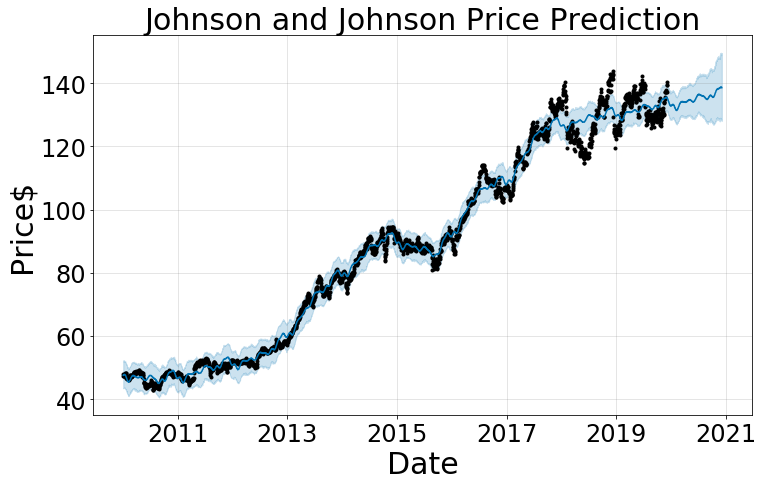

In [8]:
fig = m.plot(forecast, xlabel='Date', ylabel='Price$')
ax = fig.gca()
ax.set_title("Johnson and Johnson Price Prediction", size=30)
ax.set_xlabel("Date", size=30)
ax.set_ylabel("Price$", size=30)
ax.tick_params(axis="x", labelsize=24)
ax.tick_params(axis="y", labelsize=24)